# Sarter Notebook

In [1]:
import pandas as pd
import numpy as np 

## Reading Data

In [2]:
# read train data
df_orders = pd.read_csv("orders.csv", sep=";")
df_products = pd.read_csv("product_attributes.csv", sep=",")
df_dists = pd.read_csv("cities_data.csv", sep=";")

# read test data
df_test = pd.read_csv("test.csv", sep=";")

## Exploratory Data Analysis

In [3]:
df_orders.head()

,order_id,origin_port,3pl,customs_procedures,logistic_hub,customer,product_id,units,late_order
0,366c7a3d298f,Rotterdam,v_002,DTP,Venlo,Marseille,1692723,583,True
1,45f906331e10,Rotterdam,v_004,CRF,Rome,Marseille,1644308,459,False
2,ac84a6e4af0f,Athens,v_002,CRF,Venlo,Paris,1684170,464,True
3,f5e98cb29790,Rotterdam,v_004,CRF,Lille,Milan,1620510,678,False
4,a9e7c9bee35b,Barcelona,v_002,CRF,Venlo,Berlin,1699372,353,False


<AxesSubplot: ylabel='Frequency'>

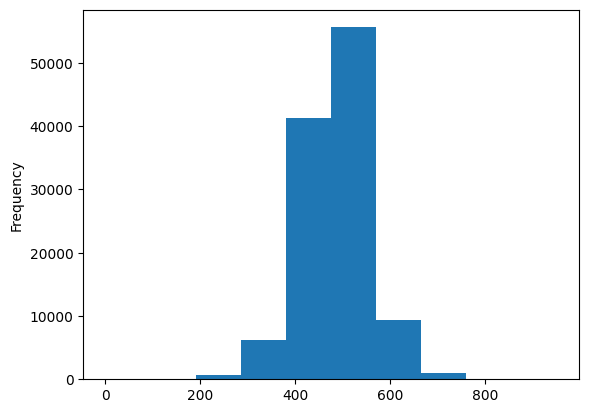

In [26]:
df_orders.units.plot.hist()

C:\Users\raulc\AppData\Local\Temp\ipykernel_1748\1592331927.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_orders.groupby(['origin_port']).sum().plot(kind='pie', y='units')


<AxesSubplot: ylabel='units'>

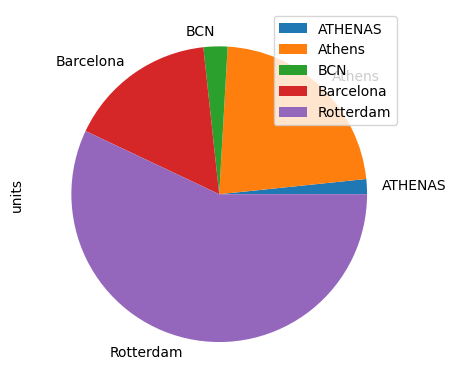

In [7]:
df_orders.groupby(['origin_port']).sum().plot(kind='pie', y='units')
## Hi ha noms diferents que es refereixen al mateix.

C:\Users\raulc\AppData\Local\Temp\ipykernel_1748\40792209.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_orders.groupby(['logistic_hub']).sum().plot(kind='pie', y='units')


<AxesSubplot: ylabel='units'>

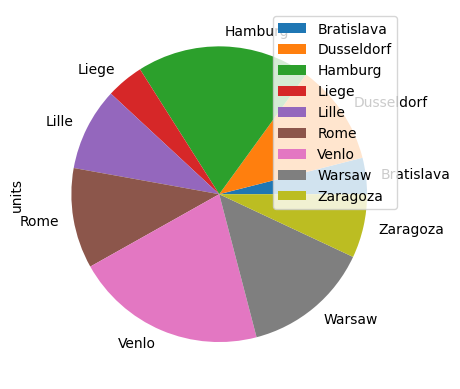

In [9]:
df_orders.groupby(['logistic_hub']).sum().plot(kind='pie', y='units')

C:\Users\raulc\AppData\Local\Temp\ipykernel_1748\2355227997.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_orders.groupby(['late_order']).sum().plot(kind='pie', y='product_id')


<AxesSubplot: ylabel='product_id'>

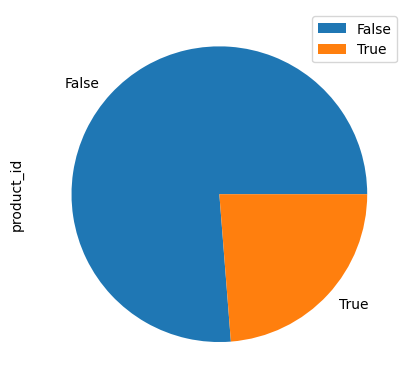

In [5]:
df_orders.groupby(['late_order']).sum().plot(kind='pie', y='product_id')

C:\Users\raulc\AppData\Local\Temp\ipykernel_1748\4196446505.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_orders.groupby(['late_order']).sum()


,product_id,units
late_order,,
False,145801184281,41687372
True,45429640130,13726810


### Try to display correlation matrix with categorical data


In [64]:
from dython.nominal import associations
from dython.nominal import theils_u
from dython.nominal import identify_nominal_columns

In [111]:
A_correl = []
for col in df_orders.columns:
   A_correl.append(theils_u(df_orders[col], df_orders.late_order, nan_strategy='REPLACE', nan_replace_value='DEFAULT_REPLACE_VALUE')
)
print(A_correl)


df = pd.DataFrame((df_orders.columns, A_correl))
df.head()


[0.047082362894410576, 0.01765136631545345, 0.00561625018708584, 0.004482893383341796, 0.004674971596165637, 0.0019003768250096412, 0.011209298394079092, 0.004171192271723271, 1.0]


<bound method NDFrame.head of           0            1         2                   3             4  \
0  order_id  origin_port       3pl  customs_procedures  logistic_hub   
1  0.047082     0.017651  0.005616            0.004483      0.004675   

          5           6         7           8  
0  customer  product_id     units  late_order  
1    0.0019    0.011209  0.004171         1.0  >

In [98]:
theils_u(df_orders.order_id, df_orders.late_order, nan_strategy='REPLACE', nan_replace_value='DEFAULT_REPLACE_VALUE')
theils_u(df_orders.origin_port, df_orders.late_order, nan_strategy='REPLACE', nan_replace_value='DEFAULT_REPLACE_VALUE')

0.01765136631545345

In [106]:
for col in df_orders.columns:
    print(df_orders.col)


AttributeError: 'DataFrame' object has no attribute 'col'

## Dummy Model

In [3]:
from sklearn.dummy import DummyClassifier

X_train = df_orders.drop(['late_order'], axis=1)
y_train = df_orders['late_order']

X_test = df_test

dummy_clf = DummyClassifier(strategy="uniform")
dummy_clf.fit(X_train, y_train)

pred_proba = dummy_clf.predict_proba(X_test)

## Save Solution
> **Note:** Submited probabilities must be for the **True** cases.

In [4]:
submission = pd.DataFrame({"order_id": X_test.order_id, "late_order": pred_proba[:,1]})
submission.to_csv("submission_kaggle.csv", index=False)